## Installing BERT sentence transformers

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 71kB 3.0MB/s 
     |████████████████████████████████| 778kB 14.4MB/s 
     |████████████████████████████████| 890kB 30.8MB/s 
     |████████████████████████████████| 3.0MB 43.0MB/s 
     |████████████████████████████████| 1.1MB 45.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.3-cp36-none-any.whl size=97299 sha256=db9bcff3401ea633448ea3d185605d1aea36d13f5ddbca152c2b4bf3f18e789b
  Stored in directory: /root/.cache/pip/wheels/75/d6/0a/cab163b21d0597cc1580bc344487b11ad405e0d1d314725f2b
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=515086c8b9f9323441aab1bb98ae198c0e64e3a63a283cee430bbf7378236b8e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


### Importing tokens for conversion sentences into tokens

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:41<00:00, 9.81MB/s]


### Lets convert some of the sample sentences

In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [ ]:
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.04094580e-01  5.27476668e-01  1.17977321e+00  1.94365591e-01
  1.59113809e-01  5.45550644e-01  2.81809568e-01  1.21590771e-01
  2.91968346e-01 -3.36858302e-01 -2.49655500e-01  2.93202072e-01
  1.43483624e-01  3.80202413e-01 -2.52250373e-01 -2.62337863e-01
 -2.69968688e-01  4.68090624e-02  3.57254207e-01 -3.58307898e-01
 -2.89181154e-02  6.85316399e-02 -7.84853637e-01 -2.61793017e-01
  1.02695417e+00 -4.05540168e-01  1.93896979e-01 -1.65969148e-01
 -2.89741635e-01 -1.07936226e-01 -6.31145060e-01 -4.68852967e-01
  7.16446459e-01 -9.49059725e-01 -2.94928048e-02  1.37836197e-02
  7.03223869e-02 -2.72192154e-02 -6.25344664e-02 -5.84831834e-01
 -9.02268648e-01 -9.56011534e-01  4.95161235e-01  1.95331304e-04
 -1.52250719e+00 -6.86905861e-01 -9.08193350e-01 -1.79840431e-01
 -6.49180174e-01 -2.96629276e-02 -1.83349526e+00  1.43428534e-01
  1.93934068e-01  1.91224944e-02 -4.56058919e-01  9.44656730e-01
  1.66151

In [ ]:
len(embedding)

768

### Importing the libraries and mounting drive

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/Akshay experiments on SOM

/content/drive/My Drive/Akshay experiments on SOM


In [ ]:
'''DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv('sentiment140.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)'''
data = pd.read_csv('great-data.csv')

In [ ]:
data.head()

,target,text
0,4,@indykitty *hug indykitty* sleep tight indy...
1,0,@Shough yeah I feel really bad for them tryin...
2,0,@embeep sorry about your sadness I'll be home...
3,0,Couldn't spend time with the family cuz of wor...
4,4,is new on twitter


### Data cleaning : Kept same to compare all models

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download('stopwords')
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
        'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
        'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
        'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
        'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',  'only', 'own', 'same', 
        'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',  'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
removed = ['no', 'nor', 'not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.text = data.text.apply(lambda x: preprocess(x))

### Splitting the dataset into test, tarin and validation data

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
data_val, data_test = train_test_split(data_test, test_size = 0.5, random_state = 42)
print("TRAIN size:", len(data_train))
print("VAL size:", len(data_val))
print("TEST size:", len(data_val))

TRAIN size: 40000
VAL size: 5000
TEST size: 5000


In [ ]:
train_text = data_train.text
val_text = data_val.text
test_text = data_test.text

### Sentence embedding on sample sentences

In [ ]:
sentence_embeddings = model.encode([" Machine learning is Fun!!!","meh I am bored"])

### Embedding training, development and testing set with SBERT representations

In [ ]:
train_embedded = model.encode(train_text)

In [ ]:
val_embedded = model.encode(val_text)
test_embedded = model.encode(test_text)

### Saving the embedded representations
##### It takes time to execute these commands hence its a better to save to keep them as back up

In [ ]:
import pickle
with open('train_embed_bert.pickle', 'wb') as handle:
    pickle.dump(train_embedded, handle)
with open('val_embed_bert.pickle', 'wb') as handle:
    pickle.dump(val_embedded, handle)
with open('test_embed_bert.pickle', 'wb') as handle:
    pickle.dump(test_embedded,handle)


### Installing SimpSOM
#### Kohonen's self organizing maps libraray

In [ ]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17086 sha256=d4655f396539bdc4c81413fa253a341737cfebfa4f4c805dc7b9081ffd011baf
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [ ]:
import SimpSOM as sps

In [ ]:
train_embedded.shape

(40000, 768)

### Training the SOM network with 20x20 grid

In [ ]:
raw_data = train_embedded
#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(20, 20, raw_data, PBC=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.01, 10000)

#Save the weights to file
net.save('word2vec_20x20')

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


In [ ]:
y_train = np.array([1 if y == 4 else 0 for y in data_train['target']])
y_val = np.array([1 if y == 4 else 0 for y in data_val['target']])
y_test = np.array([1 if y == 4 else 0 for y in data_test['target']])

#### Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#### and then according to the distance between each node and its neighbours.

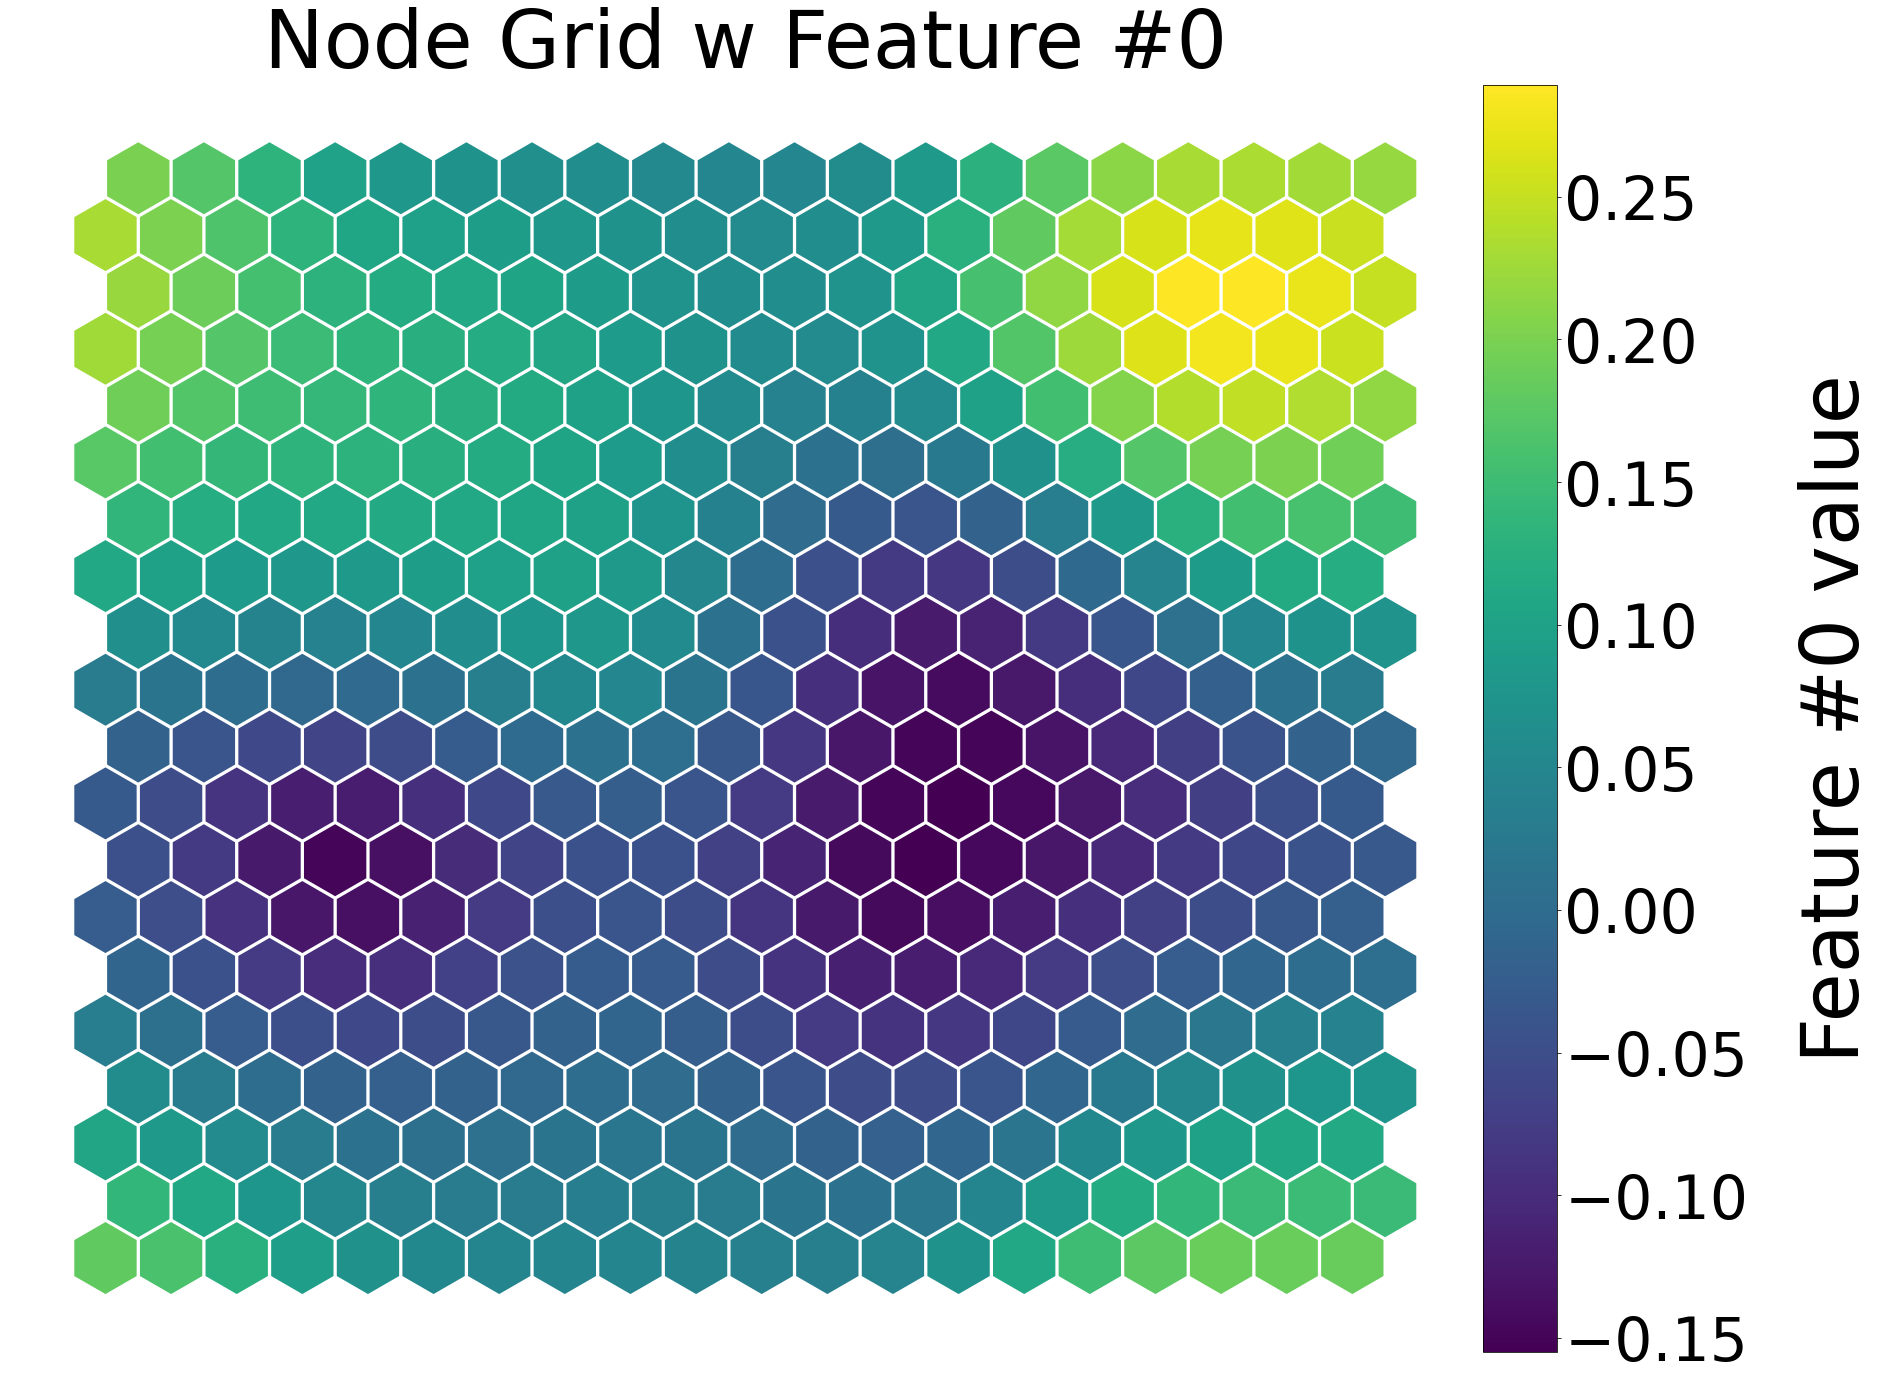

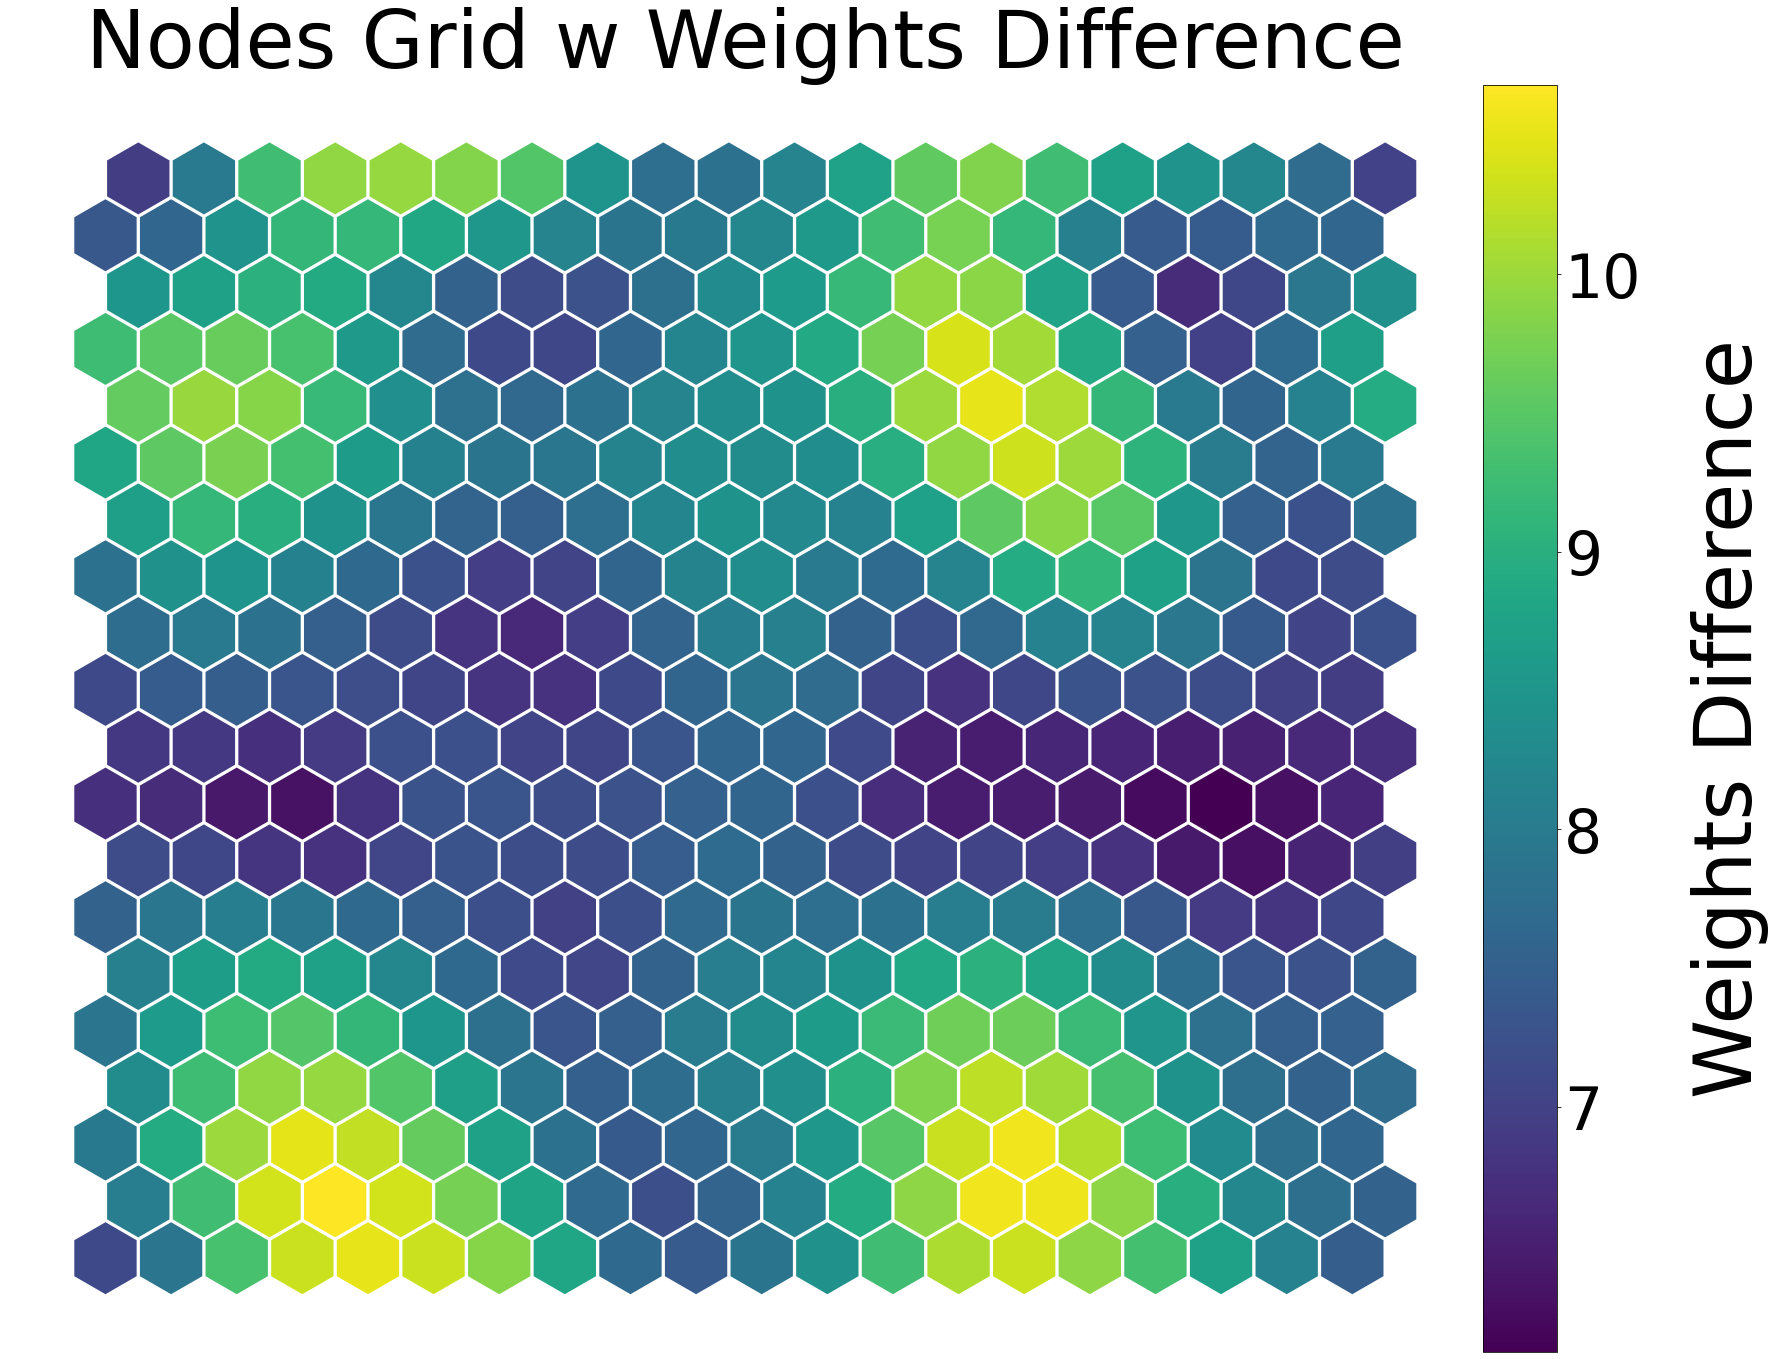

In [ ]:

net.nodes_graph(colnum=0, path = './som_bert/')
net.diff_graph(path = './som_bert/')

In [ ]:
projected_som = net.project(raw_data, labels=y_train)

<Figure size 432x288 with 0 Axes>

In [ ]:
pickle.dump(projected_som, open( "projected_bert.pkl", "wb" ) )


In [ ]:
df_projected = pd.DataFrame(columns=['p1', 'p2', 'label'])
p1 = []
p2 = []
for i in projected_som:
  p1.append(i[0])
  p2.append(i[1])

In [ ]:
df_projected['p1'] = p1
df_projected['p2'] = p2
df_projected['label'] = y_train

In [ ]:
df_projected.to_csv('som_20_20_bert.csv')

### Project the datapoints on the new 2D network map.

In [ ]:

X_val_new = val_embedded
proj_val = net.project(X_val_new, labels=y_val)

<Figure size 432x288 with 0 Axes>

In [ ]:
X_test_new= test_embedded
proj_test = net.project(X_test_new, labels = y_test)

<Figure size 432x288 with 0 Axes>

### Training supervised models on low dimensional features

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')

In [ ]:
col = df_projected.columns

x = df_projected[['p1', 'p2']].values
x

array([[15.5       ,  4.33012702],
       [16.5       ,  9.52627944],
       [ 1.        ,  6.92820323],
       ...,
       [ 6.5       , 14.72243186],
       [11.5       ,  4.33012702],
       [19.5       , 11.25833025]])

In [ ]:
clf.fit(df_projected[['p1', 'p2']].values, np.ravel(df_projected['label']))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import  accuracy_score
y_pred_val = clf.predict(np.array(proj_val))
acc_val = accuracy_score(y_true = y_val, y_pred = y_pred_val)
acc_val

0.7078

In [ ]:
clf2 = SVC()
clf2.fit(df_projected[['p1', 'p2']].values, np.ravel(df_projected['label']))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import  accuracy_score
y_pred_val = clf2.predict(np.array(proj_val))
acc_val = accuracy_score(y_true = y_val, y_pred = y_pred_val)
acc_val

0.7078

In [ ]:
y_pred_test = clf2.predict(np.array(proj_test))
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
acc_test

0.7172

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 350)
knn.fit(df_projected[['p1', 'p2']].values, np.ravel(df_projected['label']))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=350, p=2,
                     weights='uniform')

In [ ]:
y_pred_val = knn.predict(proj_val)
acc_val = accuracy_score(y_true = y_val, y_pred = y_pred_val)
acc_val

0.7104

In [ ]:
y_pred_test = knn.predict(np.array(proj_test))
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
acc_test

0.7206

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(df_projected[['p1', 'p2']].values, np.ravel(df_projected['label']))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_val = lr.predict(proj_val)
acc_val = accuracy_score(y_true = y_val, y_pred = y_pred_val)
print(acc_val)
y_pred_test = lr.predict(np.array(proj_test))
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
acc_test

0.5918


0.6008

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim = 2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer= 'adam', metrics=['accuracy'])

In [ ]:
df_projected.head

<bound method NDFrame.head of          p1         p2  label
0      15.5   4.330127      0
1      16.5   9.526279      1
2       1.0   6.928203      0
3       8.0  12.124356      1
4       7.0  12.124356      1
...     ...        ...    ...
39995   9.5   4.330127      0
39996   3.5   6.062178      1
39997   6.5  14.722432      1
39998  11.5   4.330127      1
39999  19.5  11.258330      1

[40000 rows x 3 columns]>

In [ ]:
train_x = df_projected[['p1', 'p2']].values
train_y = np.ravel(df_projected['label'])

In [ ]:
train_y

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
model.fit(train_x, train_y, epochs=32, batch_size=128, validation_split=0.2 )

Epoch 1/32
250/250 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6361 - val_loss: 0.6072 - val_accuracy: 0.6898
Epoch 2/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7027 - val_loss: 0.5823 - val_accuracy: 0.7060
Epoch 3/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7138 - val_loss: 0.5644 - val_accuracy: 0.7161
Epoch 4/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7131 - val_loss: 0.5684 - val_accuracy: 0.7111
Epoch 5/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7130 - val_loss: 0.5650 - val_accuracy: 0.7190
Epoch 6/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7154 - val_loss: 0.5628 - val_accuracy: 0.7146
Epoch 7/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7145 - val_loss: 0.5610 - val_accuracy: 0.7215
Epoch 

In [ ]:
model.fit(train_x, train_y, epochs=32, batch_size=128, validation_split=0.2 )

Epoch 1/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7165 - val_loss: 0.5616 - val_accuracy: 0.7209
Epoch 2/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7170 - val_loss: 0.5591 - val_accuracy: 0.7236
Epoch 3/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7162 - val_loss: 0.5622 - val_accuracy: 0.7218
Epoch 4/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7173 - val_loss: 0.5603 - val_accuracy: 0.7181
Epoch 5/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7178 - val_loss: 0.5610 - val_accuracy: 0.7179
Epoch 6/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7167 - val_loss: 0.5638 - val_accuracy: 0.7165
Epoch 7/32
250/250 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7171 - val_loss: 0.5616 - val_accuracy: 0.7195
Epoch 